In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import copy
import tensorflow as tf
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [31]:
cols=["bike_count","hour","temp","humidity","wind","visibility","dew_pt_temp","radiation","rain","snow","functional"]
df = pd.read_csv("/Users/vidyanshsinha/Desktop/machine learning/SeoulBikeData.csv", encoding="ISO-8859-1").drop(["Date","Holiday","Seasons"],axis=1)
df.columns=cols
df["functional"]=(df["functional"]=="Yes").astype(int)
df=df[df["hour"]==12]
df=df.drop(["hour"],axis=1)
cols=df.columns
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


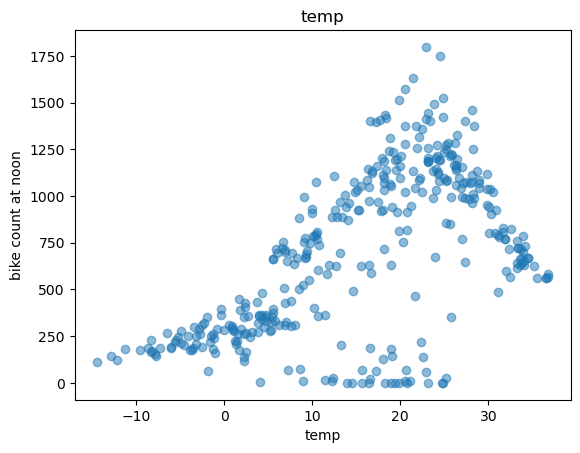

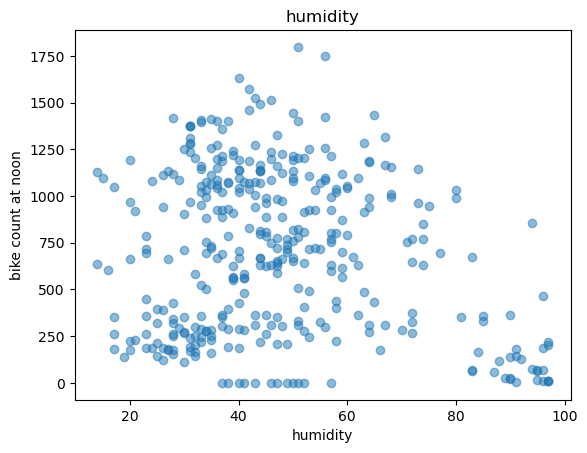

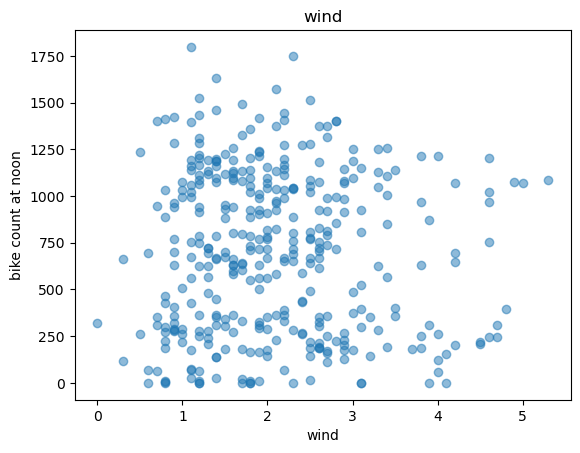

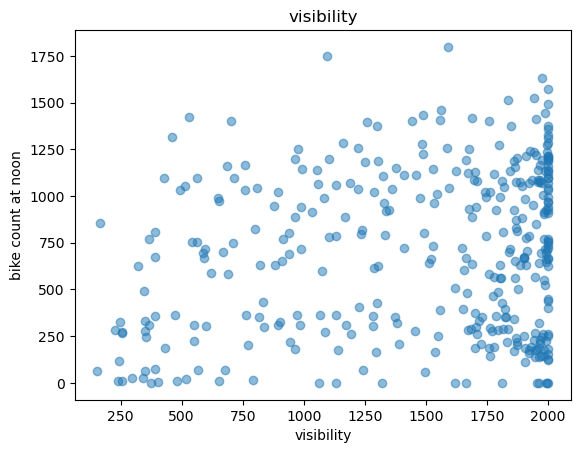

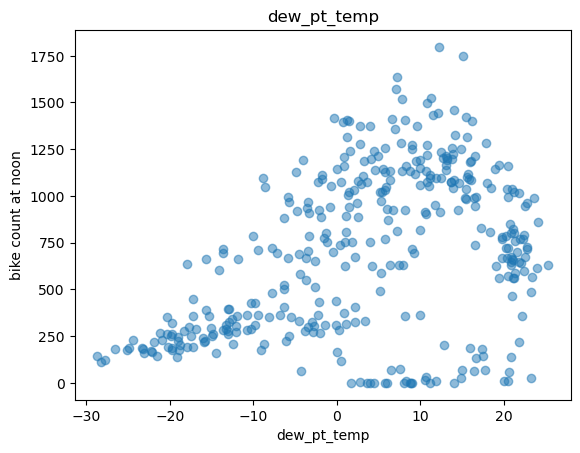

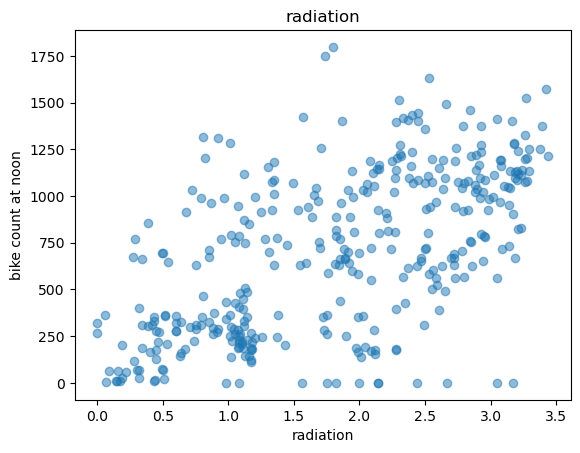

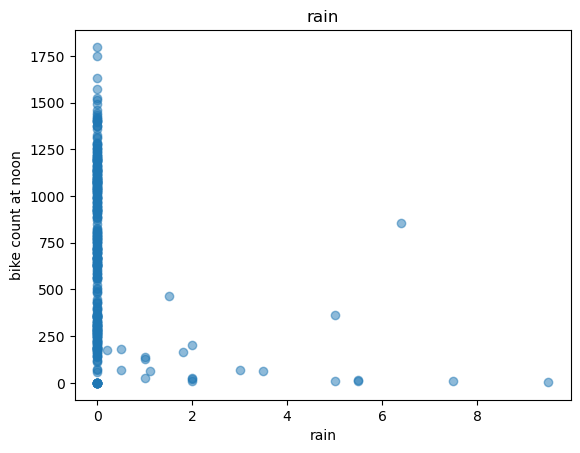

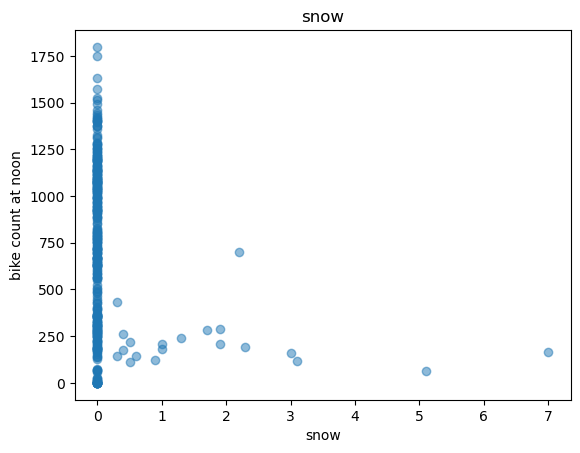

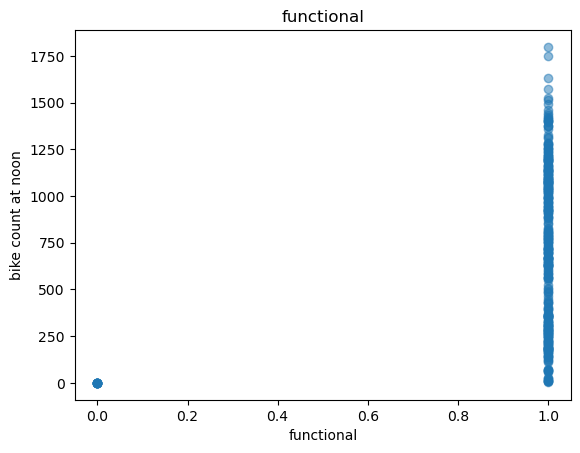

In [33]:
for label in cols[1:]:
    plt.scatter(df[label],df["bike_count"],alpha=0.5)
    plt.title(label)
    plt.ylabel("bike count at noon")
    plt.xlabel(label)
    plt.show()

In [47]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


In [51]:
train,valid,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

/opt/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [77]:
def get_xy(dataframe,y_label,x_labels=None):
    dataframe=copy.deepcopy(dataframe)
    if x_labels is None:
        x=dataframe[[c for c in dataframe.columns if c!=y_label]].values
    else:
        if len(x_labels)==1:
              x=dataframe[x_labels[0]].values.reshape(-1,1)
        else:
            x=dataframe[x_labels].values
            
    y=dataframe[y_label].values.reshape(-1,1)
    data=np.hstack((x,y))
    return data,x,y

In [79]:
_,x_temp_train,y_temp_train=get_xy(train,"bike_count",x_labels=["temp"])
_,x_temp_val,y_temp_val=get_xy(valid,"bike_count",x_labels=["temp"])
_,x_temp_test,y_temp_test=get_xy(test,"bike_count",x_labels=["temp"])

In [81]:
temp_reg=LinearRegression()
temp_reg.fit(x_temp_train,y_temp_train)

LinearRegression()

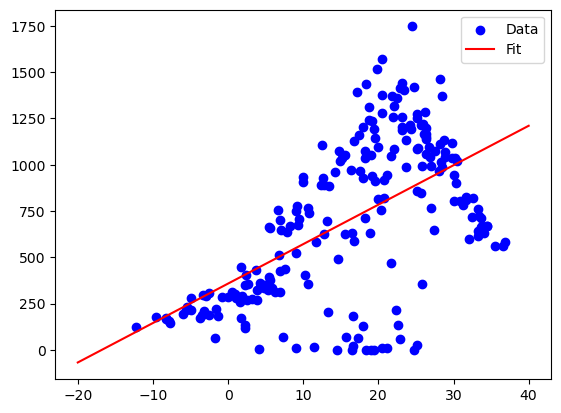

In [83]:
plt.scatter(x_temp_train,y_temp_train,label="Data",color="blue")
x=tf.linspace(-20,40,100)
plt.plot(x,temp_reg.predict(np.array(x.numpy().reshape(-1,1))),label="Fit",color="red")
plt.legend()
plt.show()

In [90]:
train,valid,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df.columns))])
_,x_train_all,y_train_all=get_xy(train,"bike_count",x_labels=df.columns[1:])
_,x_val_all,y_val_all=get_xy(valid,"bike_count",x_labels=df.columns[1:])
_,x_test_all,y_test_all=get_xy(test,"bike_count",x_labels=df.columns[1:])


/opt/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [92]:
all_reg=LinearRegression()
all_reg.fit(x_train_all,y_train_all)

LinearRegression()

In [94]:
all_reg.score(x_test_all,y_test_all)

0.47348632937699064

## REGRESSION USING NN